# Personal Loan Campaign

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

The Descriptions of the colums  in the dataset are follows:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Load The Dataset


### Import the Required Packages

In [1]:
#Importing the libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE 

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Read the CSV file
df = pd.read_csv('Loan_Modelling.csv')

# Display the first few rows of the DataFrame
print(df.head())

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


### Explore the Dataset

In [3]:
# Check the first few rows of the dataset

df.shape

(5000, 14)

In [4]:
# Check the data types of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The given DataFrame contains 5000 entries and 14 columns representing various attributes such as age, experience, income, ZIP code, family size, credit card spending, education level, mortgage amount, and indicators for personal loan, securities account, CD account, online banking usage, and credit card ownership. Most columns are integers, except for the "CCAvg" column, which is a floating-point number representing average credit card spending.

In [5]:
# Check the missing Value 

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# Display decriptive statistics of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The dataset contains information on 5000 individuals. The following is a summary of the statistical properties of the numerical variables:

Age:
The age of the individuals ranges from 23 to 67 years, with an average age of approximately 45.34 years. The standard deviation of 11.46 suggests some variability in the ages, indicating that the age distribution is not highly concentrated around the mean.

Experience:
The experience of the individuals ranges from -3 to 43 years, with an average experience of approximately 20.10 years. The standard deviation of 11.47 suggests a fair amount of variability in the experience levels of the individuals. it also show that some of are having minus as experience this need to be check and clean up. i am going to remove the minus in the begining of the it.

Income:
The income of the individuals ranges from $8,000 to $224,000, with an average income of approximately $73,774.20. The standard deviation of $46,033.73 indicates a significant degree of variability in the income levels of the individuals.

ZIPCode:
The ZIP codes in the dataset have an average value of approximately 93,169.26, with a standard deviation of 1,759.46. This indicates that the ZIP codes vary considerably, suggesting that the individuals in the dataset come from different geographical locations.

Family:
The number of family members for each individual ranges from 1 to 4, with an average of approximately 2.40. The standard deviation of 1.15 suggests some variability in the family sizes of the individuals.

CCAvg:
The average credit card spending per month (CCAvg) among the individuals is approximately $1.94, with a standard deviation of $1.75. This indicates some variability in the credit card spending patterns among the individuals.

Education:
The individuals' education levels range from 1 to 3, with an average level of approximately 1.88. The standard deviation of 0.84 suggests some variation in the education levels of the individuals.

Mortgage:
The mortgage amounts for the individuals range from $0 to $635,000, with an average mortgage of approximately $56,498.80. 
The standard deviation of $101,713.80 indicates a significant degree of variability in the mortgage amounts.

These statistics provide a summary of the numerical variables in the dataset, giving an overview of the age distribution, experience levels, income range, ZIP codes, family sizes, credit card spending, education levels, and mortgage amounts among the individuals.

In [7]:
# Remove negative values from the "Experience" column
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

The summary output describes the "Experience" column with the following statistics:

The count of entries is 5000.
The mean (average) value is approximately 20.10.
The standard deviation is approximately 11.47, indicating the degree of variation in the data.
The minimum value is -3, indicating the lowest recorded experience, which need to be handle.
The 25th percentile (first quartile) is 10, meaning 25% of the data falls below this value.
The median (50th percentile) is 20, indicating that 50% of the data falls below this value.
The 75th percentile (third quartile) is 30, meaning 75% of the data falls below this value.
The maximum value is 43, representing the highest recorded experience in the dataset.

In [8]:
# Cleaning the Experience colum, there some people that have minus(-) 

# Remove the negative sign from the "Experience" column
df['Experience'] = df['Experience'].astype(str).str.replace('-', '')

# Convert the "Experience" column back to numeric values
df['Experience'] = pd.to_numeric(df['Experience'])

In [9]:
# Remove negative values from the "Experience" column
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

## Data Visualization

##### Univariate Analysis: Numerical Features


In [10]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

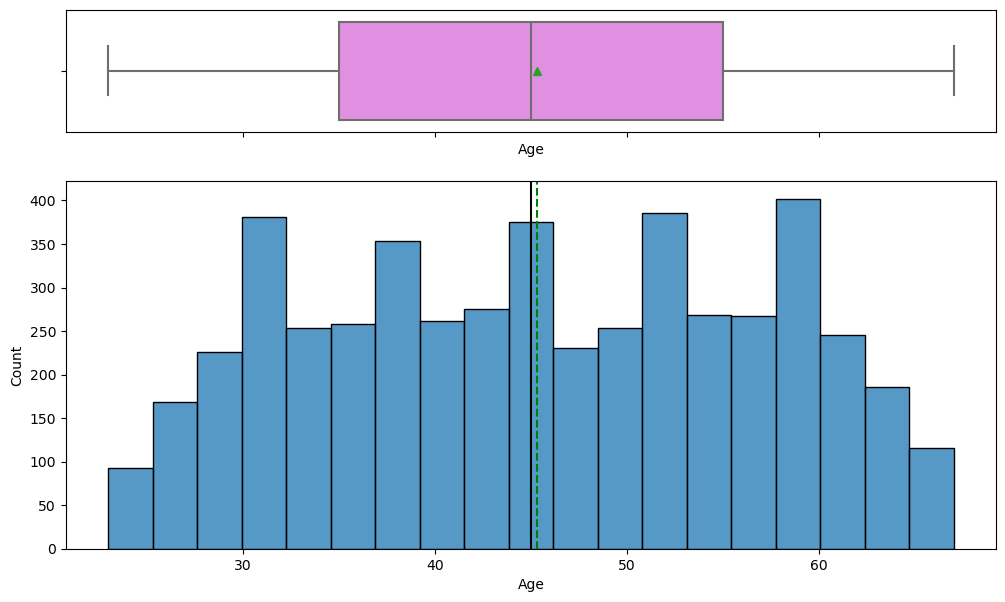

In [11]:
histogram_boxplot(data = df, feature = 'Age')

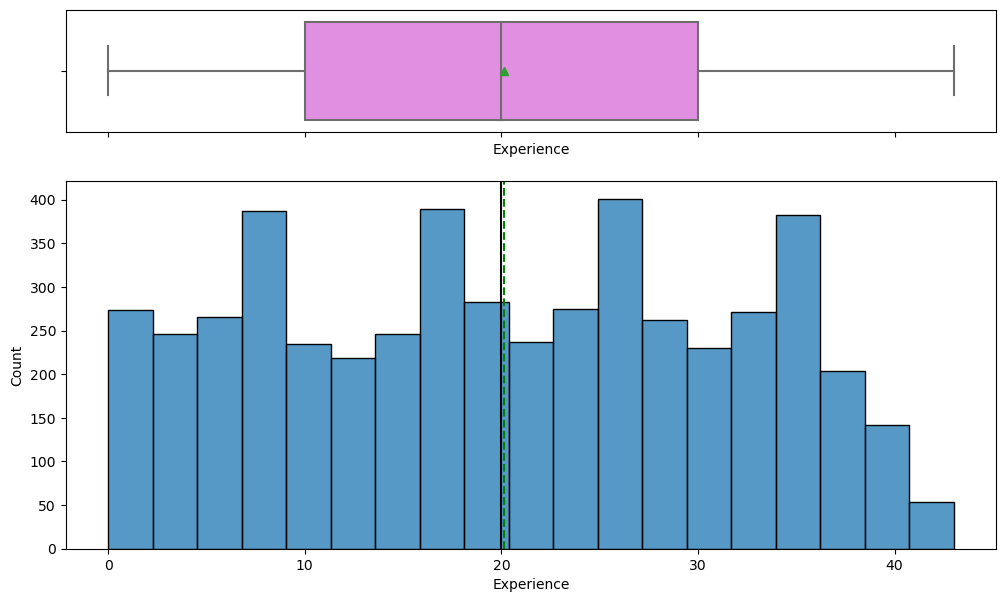

In [12]:
histogram_boxplot(data = df, feature = 'Experience')

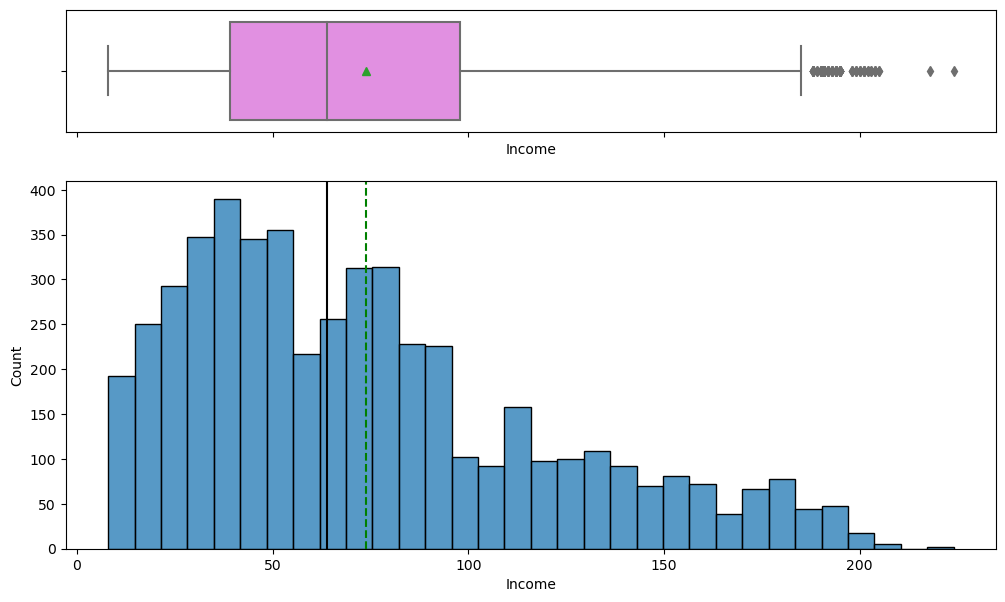

In [13]:
histogram_boxplot(data = df, feature = 'Income')

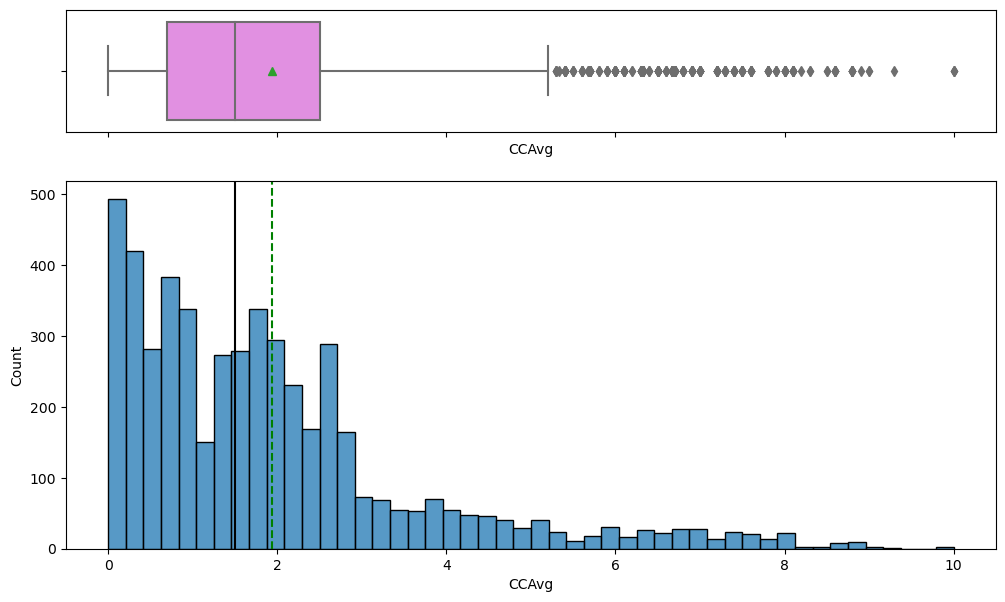

In [15]:
histogram_boxplot(data = df, feature = 'CCAvg')

The plot shows that there are outliers

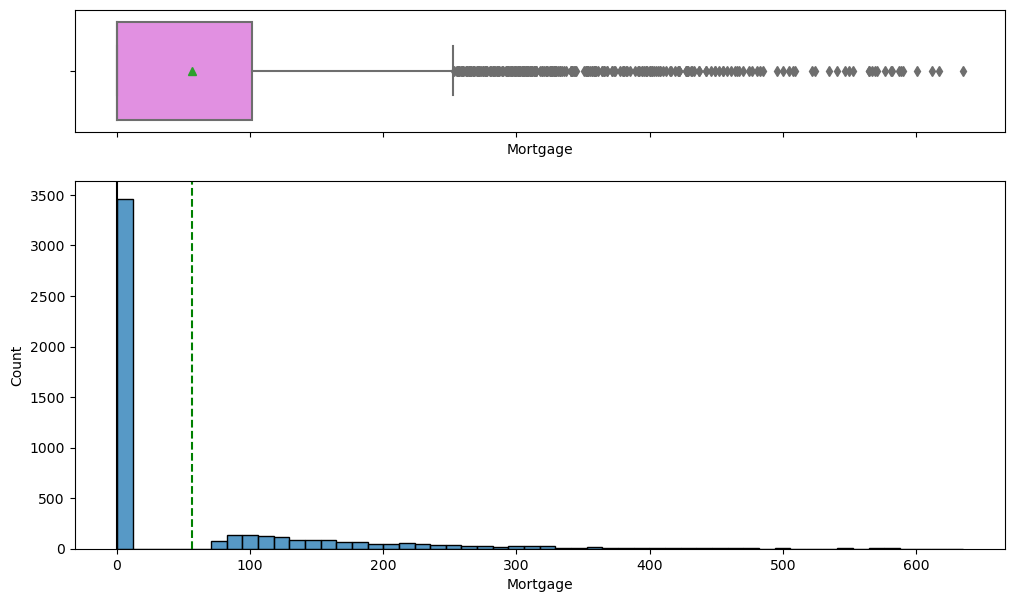

In [17]:
histogram_boxplot(data = df, feature = 'Mortgage')

The plot above shows there are outliers

## Bivariate Visualization

In [105]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

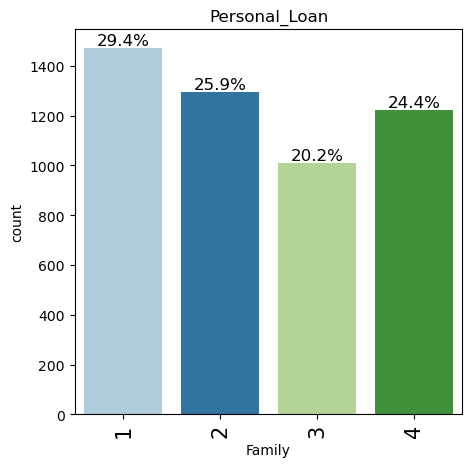

In [106]:
labeled_barplot(data = df, feature = 'Family', perc = True, title = 'Personal_Loan')

The plot above shows, single-person households have a higher percentage of personal loans, accounting for 29.4%.

In [23]:
# Check the missing Value 

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [24]:
# Drop the "ID" and "ZIPCode" columns
df = df.drop(['ID', 'ZIPCode'], axis=1)

# Print the updated dataset
print(df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


## Identify Correlation in the Data

<AxesSubplot:>

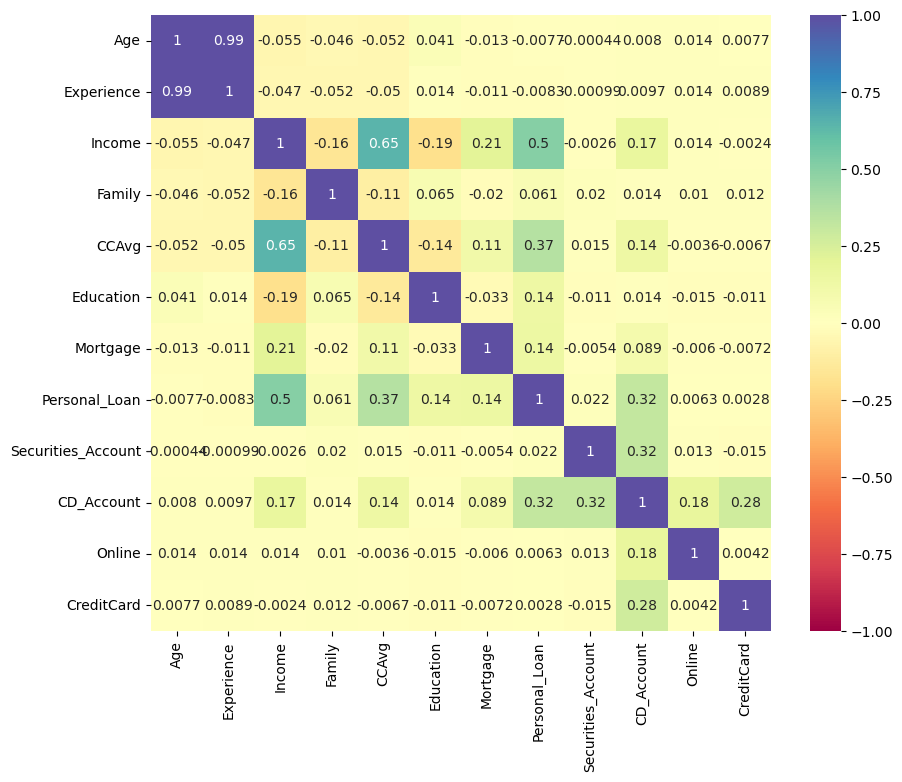

In [25]:
# Check for correlation

mat_cor = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(mat_cor, annot=True, vmin = -1, vmax = 1, cmap ="Spectral")

Based on the objectives provided, the target variable would be the "Personal_Loan" column, which represents whether a liability customer will buy a personal loan or not. This column as the target variable for predictive modeling task.

The "Personal_Loan" column is a binary variable with values 0 and 1. A value of 0 indicates that the customer did not buy a personal loan, while a value of 1 indicates that the customer did buy a personal loan.

In predictive modeling task, using the other variables in the dataset as input features to build a model that predicts whether a customer is likely to buy a personal loan based on their characteristics.

The data need to be split the dataset into training and testing sets before building your model and evaluate the performance of your model using appropriate evaluation metrics such as accuracy, precision, recall, or ROC AUC.

In [26]:
# sns.pairplot(df, hue='Personal_Loan')
# plt.show()

In [27]:
#checking the correlation

mat_cor = df.corr()

mat_cor

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


The output appears to be a correlation matrix showing the correlation coefficients between different variables in a dataset. Here is a summary based on the correlation coefficients:

1. Age and Experience have a very strong positive correlation (approximately 0.994), indicating that they are highly related. This is expected since experience is typically related to age.
2. Income and Personal_Loan have a moderately positive correlation (approximately 0.502), suggesting that higher income levels may be associated with a higher likelihood of taking a personal loan.
3. Income and CCAvg (Average Credit Card Spending) have a moderate positive correlation (approximately 0.646), indicating that higher income individuals tend to have higher credit card spending on average.
4. Education and Income have a negative correlation (approximately -0.188), suggesting that higher levels of education may be associated with lower income levels.
5. Personal_Loan and CD_Account have a moderate positive correlation (approximately 0.316), indicating that customers with a certificate of deposit (CD) account may have a higher likelihood of taking a personal loan.
6. Securities_Account and CD_Account have a relatively high positive correlation (approximately 0.317), suggesting that customers with a securities account are more likely to have a certificate of deposit account.
7. There are no strong correlations between the remaining variables (|correlation coefficient| < 0.3).

It is reveal the there is multicollinearity, Age and Expericence have a strong correlation with close to one(0.99) and there is a strong relationship/correlation between Income and CCAvg(Average Credit Card Spending). 

In [28]:
# Select numerical variables
num_data = df.select_dtypes(include = "number")

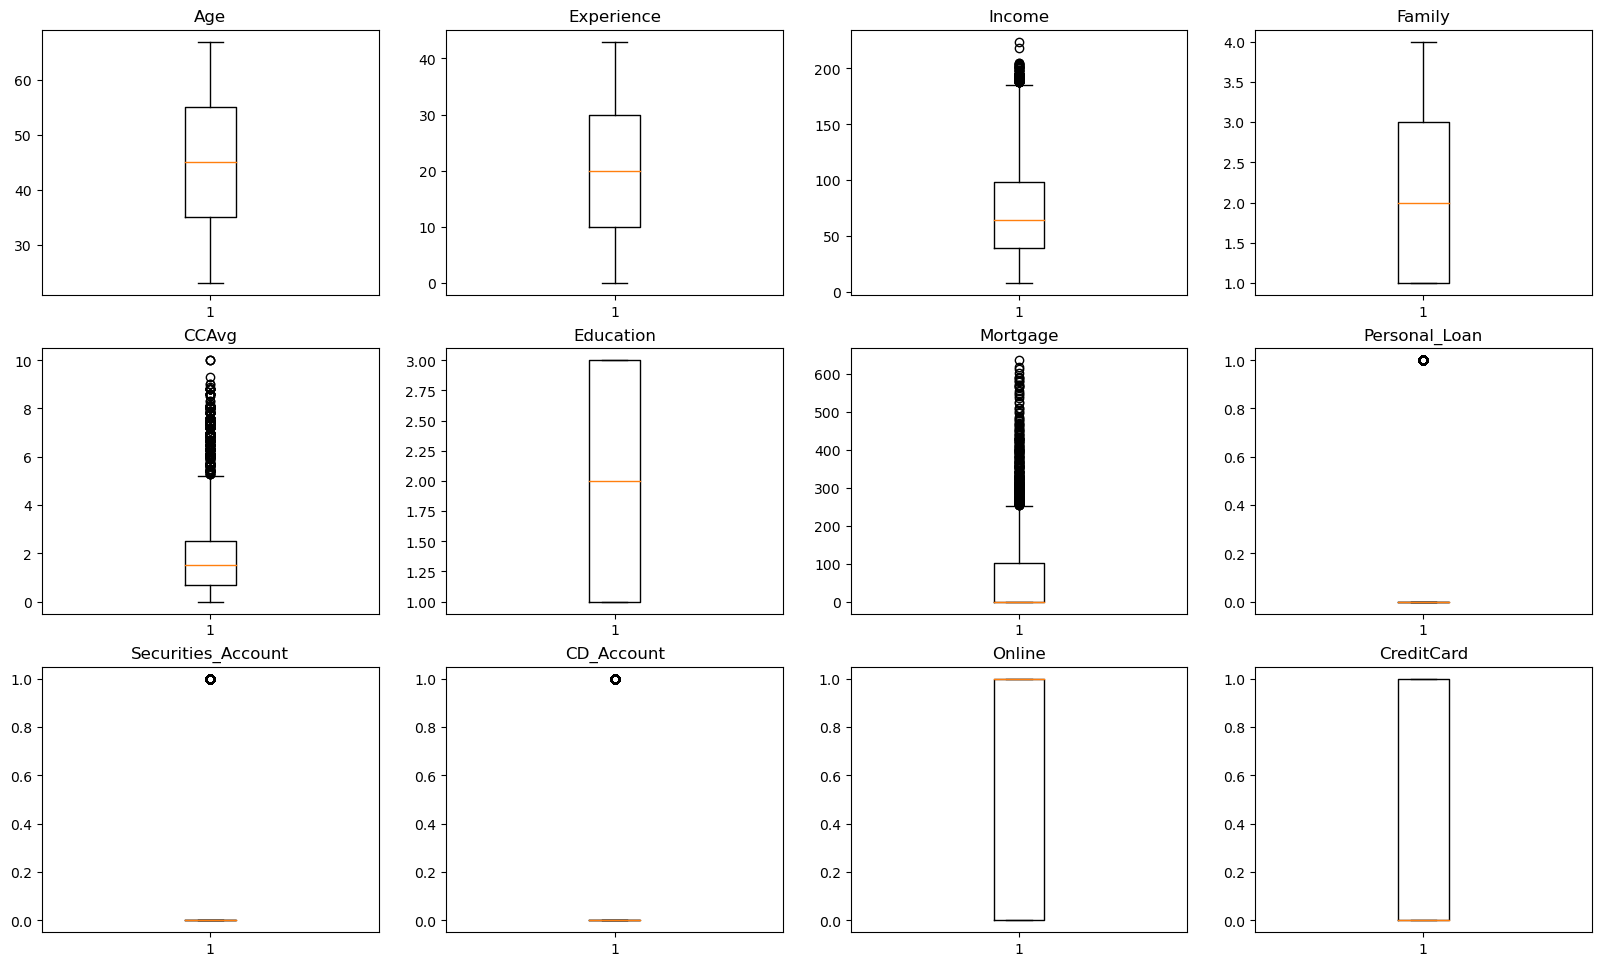

In [29]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

#plt.savefig("outlier_plots.png")
plt.show()

In [30]:
# Drop the salary
num_data.drop(["Personal_Loan"], axis = 1, inplace = True)

num_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(df, col):
    """
    Treat outliers in numerical variables
    df: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = df[col].quantile(0.25) # first quartile
    Q3 = df[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    df[col] = np.clip(df[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return df

I used clipping to treat the outlier, any outlier below the lower whisker or upper whiskers were clipped to the the lower and upper whiskers respectively

In [32]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(df, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for w in col_list:
        df = treat_outliers(df, w)
    return df

In [33]:
df = treat_outliers_all(df, num_data)

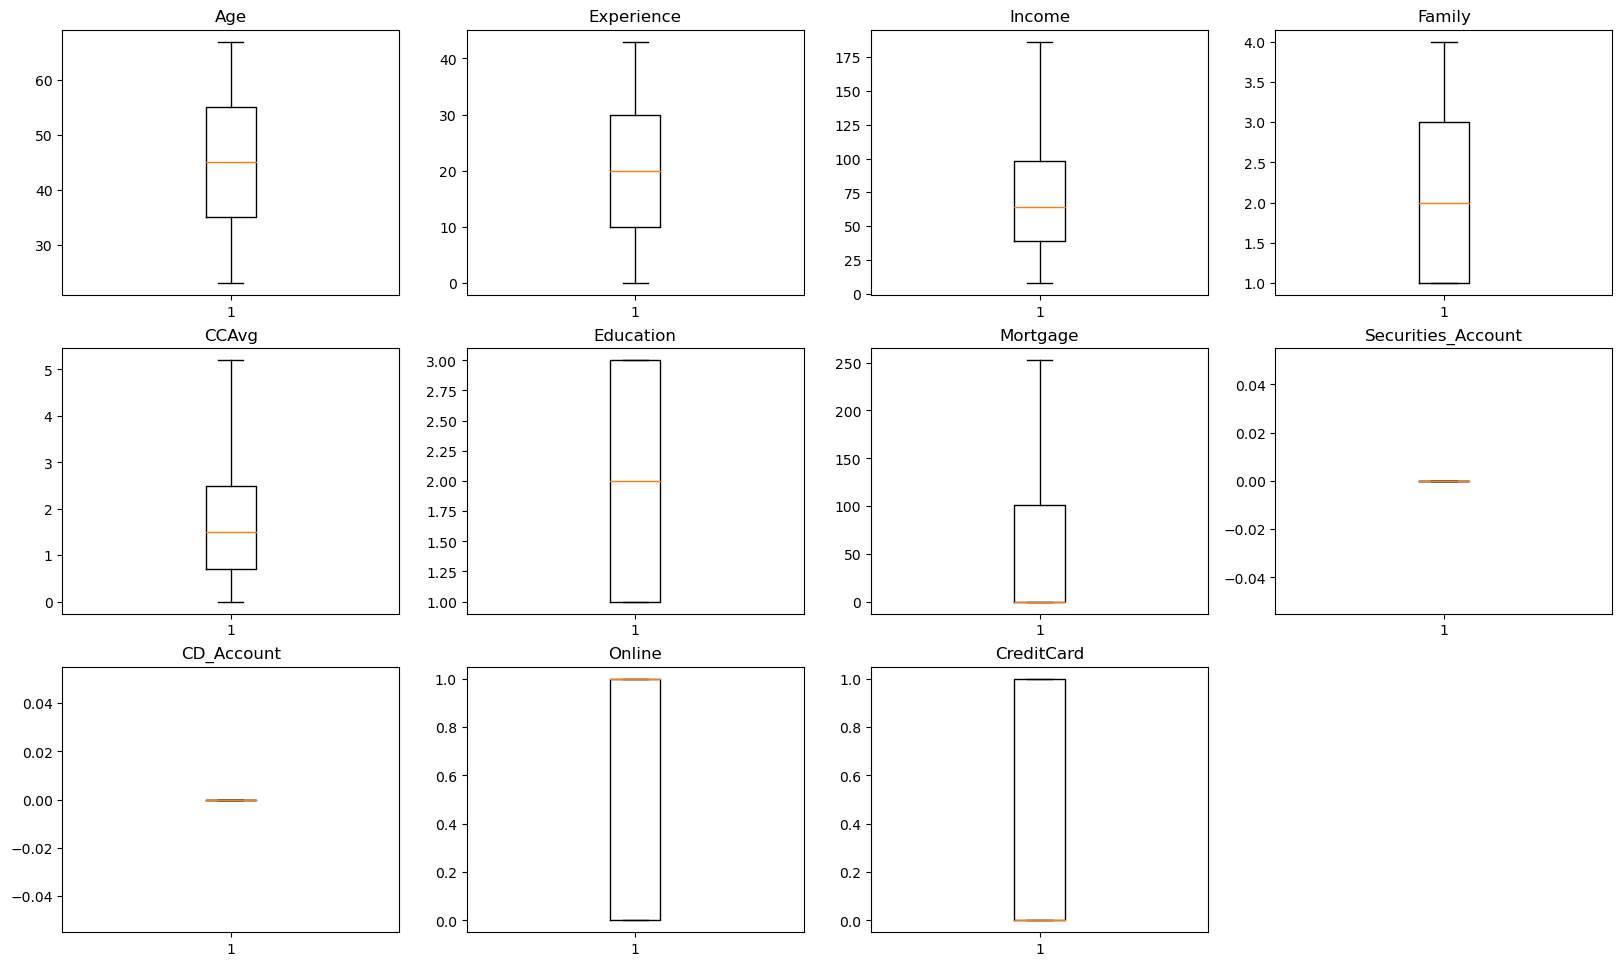

In [34]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

#plt.savefig("outlier_plots.png")
plt.show()

### Split data into train and test sets

In [35]:
# Split the data into features and target variable
X = df.drop(['Personal_Loan'], axis=1)  # Features
y = df['Personal_Loan']  # Target variable

In [36]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Normalization

In [37]:
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

## Build Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
# Create a LinearRegression object
model = LinearRegression()

In [39]:
# Fit the model to the training data
model.fit(x_train_sd, y_train)

LinearRegression()

In [40]:
# Make predictions on the test data
y_pred = model.predict(x_test_sd)

In [41]:
y_pred

array([-8.76165176e-02,  3.86867777e-01,  1.95577037e-01, -9.51191147e-02,
       -3.15943209e-02,  7.39352208e-02,  2.02967629e-01,  2.17992901e-01,
        2.03485668e-02,  2.64752368e-01, -3.55841639e-03,  1.84840997e-01,
        4.17239944e-01,  9.12750802e-02,  2.74157152e-01,  3.11355416e-01,
        7.28877958e-02,  3.21645661e-01, -8.26729935e-02,  6.75985149e-01,
       -2.43400985e-02,  2.18040504e-01,  2.06063114e-01,  2.77969299e-02,
       -7.27348914e-02,  2.48399257e-02,  1.86445196e-01,  2.02953757e-01,
        8.67689676e-02,  1.08388204e-01,  2.86250722e-01,  4.48143028e-02,
        5.17795956e-01,  2.43806918e-02,  8.30634982e-02,  8.79251877e-03,
        3.74665044e-03,  2.20970112e-01, -1.63524573e-01, -2.15320405e-01,
       -2.57594361e-02,  1.46866107e-01,  2.15813785e-01,  2.02697476e-01,
        1.00434426e-01,  1.08405315e-01,  2.87303406e-01,  6.65646901e-02,
        7.59813709e-02,  1.16768310e-01,  2.46173983e-01,  3.02695624e-01,
        1.90444915e-01,  

In [42]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

## interpreting Model Performance and Coefficients

In [43]:
lin_reg_train = model_performance_regression(model, x_train_sd, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.239839,0.16543,0.322949,0.321081


In [44]:
lin_reg_test = model_performance_regression(model, x_test_sd, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.240914,0.167799,0.382394,0.375518


In [45]:
model.coef_

array([-2.37797803e-01,  2.62892186e-01,  5.64661090e-01,  1.09128274e-01,
        1.05073415e-01,  1.64377010e-01,  2.59571628e-02, -2.42861287e-17,
        0.00000000e+00,  1.67626859e-03, -3.00726335e-03])

In [46]:
def check_coef(x_train, model):
    for i, col in enumerate(x_train.columns):
        print(f'{col} has coeffient of {np.exp(model.coef_[i])}')

In [47]:
#import the Ridge algorithm
from sklearn.linear_model import Ridge

# Creating an instante 
ridge = Ridge(random_state=0, alpha=1.5)

# fit the model
ridge.fit(x_train_sd, y_train)

Ridge(alpha=1.5, random_state=0)

In [48]:
# check perfomarce of ridge regression on train data

ridge_train = model_performance_regression(ridge, x_train_sd, y_train)
ridge_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.239866,0.16519,0.322798,0.32093


In [49]:
# check perfomarce of ridge regression on train data

ridge_test = model_performance_regression(ridge, x_test_sd, y_test)
ridge_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.24093,0.167504,0.38231,0.375433


In [50]:
# Perform Ridge regression to address collinearity
ridge.fit(x_train_sd[:, [1, 2]], x_train_sd[:, [0]])  # Fit the model to the specified features

# Obtain the transformed features using the learned coefficients
x_train_trans = x_train_sd.copy()
x_train_trans[:, [1, 2]] = x_train_trans[:, [1, 2]] @ ridge.coef_.T

x_test_trans = x_test_sd.copy()
x_test_trans[:, [1, 2]] = x_test_trans[:, [1, 2]] @ ridge.coef_.T

In [51]:
x_train_trans

array([[0.20454545, 0.15239038, 0.15239038, ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.28997596, 0.28997596, ..., 0.        , 1.        ,
        0.        ],
       [0.18181818, 0.14910103, 0.14910103, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.45454545, 0.40034207, 0.40034207, ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.21786729, 0.21786729, ..., 0.        , 1.        ,
        0.        ],
       [0.77272727, 0.69790477, 0.69790477, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
x_test_trans

array([[0.15909091, 0.08877037, 0.08877037, ..., 0.        , 0.        ,
        1.        ],
       [0.54545455, 0.51118566, 0.51118566, ..., 0.        , 0.        ,
        1.        ],
       [0.15909091, 0.10675843, 0.10675843, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86363636, 0.83304986, 0.83304986, ..., 0.        , 1.        ,
        0.        ],
       [0.22727273, 0.20136475, 0.20136475, ..., 0.        , 0.        ,
        0.        ],
       [0.15909091, 0.13355346, 0.13355346, ..., 0.        , 1.        ,
        0.        ]])

After performing ridge the model is still not performing well.

# Logistic Regression

In [53]:
# Build the model
log_reg = LogisticRegression(random_state= 0, class_weight= {1:0.9,0:0.1}, max_iter=1000)

# Fit the model to the training data
log_reg.fit(x_train_trans, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [54]:
log_reg.score(x_train_sd, y_train)

0.79625

In [55]:
log_reg.score(x_test_sd, y_test)

0.803

It appears that the model is performing well. Here are the scores:

Training accuracy: 0.796 Test accuracy: 0.803 The low accuracy scores suggest that the model is not able to effectively generalize to new, unseen data. This could be an indication of overfitting.

# My focuse is to maximax the Recall

# Model Performance Check & Confusion Matrix

In [56]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:,1]
    
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)# to compute accuracy
    recall = recall_score(target, pred_class) # to compute recall
    precision = precision_score(target, pred_class) # compute precision
    f1 = f1_score(target, pred_class) # to compute F1 Score

       # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf =  confusion_matrix(target, pred_class)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf, annot = True, fmt = "g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

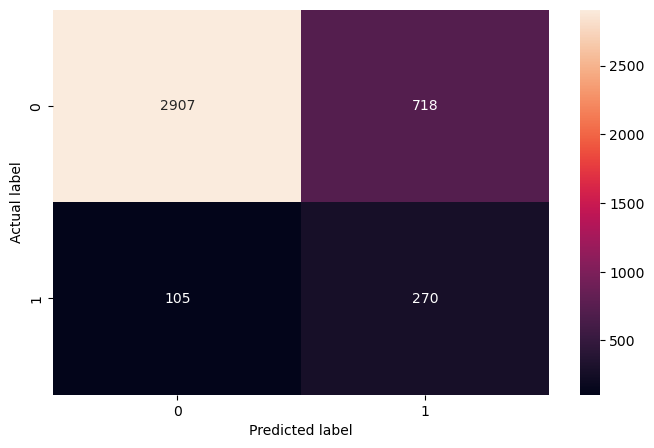

,Accuracy,Recall,Precision,F1-score
0,0.79425,0.72,0.273279,0.396185


In [57]:
log_reg_train = model_performance_classification(log_reg, x_train_trans,y_train)
log_reg_train

2907(TN) and 270(TP) are the correct predictions of the model 105(FN) and 718(FP) are the wrong predictions the model makes.

~ FN- wrongly predicting positive class as negative~

The model predicts correctly that 2907 did not accept the personal loan offered in the last campaign and 270 accept the personal loan offered in the last campaign.

The model predicts wrongly that 718 people who accept the personal loan offered in the last campaign while 105 people accept the personal loan offered in the last campaign did not accept the personal loan offered in the last campaign according to the confusion matrix.

Accuracy of 0.879 is how much correct predictions were made on salary earnings ((TN+TP)/(TN+TP+FN+FP))

Precision of 0.273 is how much model got correctly out of the positive prediction ((TP)/(TP+FP)). Model got 27% (270) correctly on those who accept the personal loan offered in the last campaign. Precision is on the postive predictions of the data

Recall is out of those who accept the personal loan offered in the last campaign (FN+TP) the model predicted correctly 72% (TP)(270). Recall is on the positive class in the data

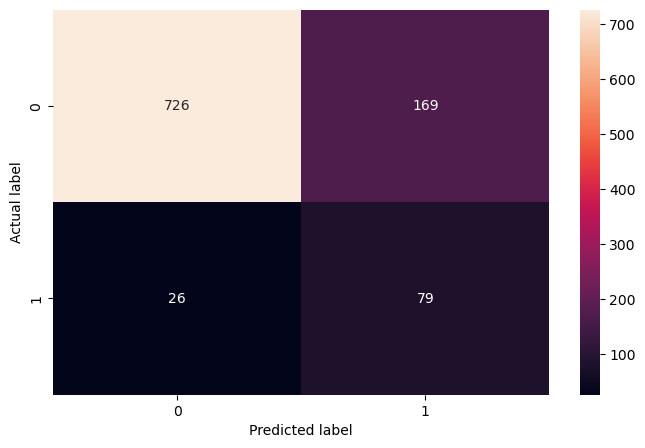

,Accuracy,Recall,Precision,F1-score
0,0.805,0.752381,0.318548,0.447592


In [58]:
log_reg_test = model_performance_classification(log_reg, x_test_trans,y_test)
log_reg_test

726(TN) and 79(TP) are the correct predictions of the model 105(FN) and 718(FP) are the wrong predictions the model makes.

~ FN- wrongly predicting positive class as negative~

The model predicts correctly that 726 did not accept the personal loan offered in the last campaign and 79 accept the personal loan offered in the last campaign.

The model predicts wrongly that 169 people who accept the personal loan offered in the last campaign while 26 people accept the personal loan offered in the last campaign did not accept the personal loan offered in the last campaign according to the confusion matrix.

Accuracy of 0.805 is how much correct predictions were made on salary earnings ((TN+TP)/(TN+TP+FN+FP))

Precision of 0.318 is how much model got correctly out of the positive prediction ((TP)/(TP+FP)). Model got 31% (79) correctly on those who accept the personal loan offered in the last campaign. Precision is on the postive predictions of the data

Recall is out of those who accept the personal loan offered in the last campaign (FN+TP) the model predicted correctly 75% (TP)(79). Recall is on the positive class in the data

## Forward feature selection

In [59]:
# Instantiate the logistic regression model
logreg = LogisticRegression(random_state = 0, max_iter=1000)

# Build the forward feature selection
sfs = SFS(logreg, k_features=x_train.shape[1], forward=True, verbose=2, scoring="recall", cv=5)

# Fit the model
sfs = sfs.fit(x_train_trans, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.5s finished

[2023-05-31 21:22:33] Features: 1/11 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished

[2023-05-31 21:22:35] Features: 2/11 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s finished

[2023-05-31 21:22:38] Features: 3/11 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:  

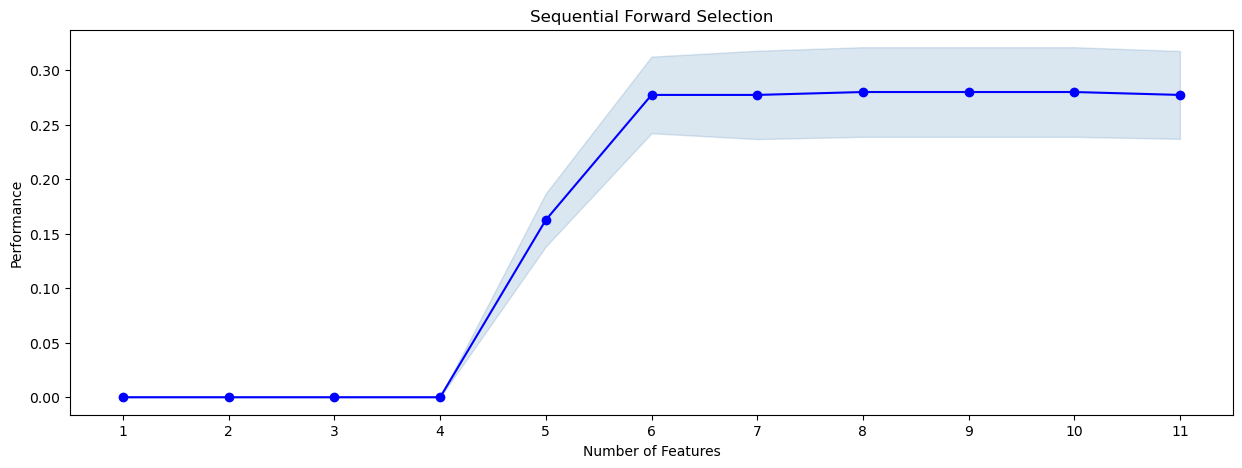

In [60]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind= "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

In [61]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train.columns[feat_cols]

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [62]:
list(sfs.k_feature_names_)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [63]:
list(sfs.k_feature_names_)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [64]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 =x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]

In [65]:
# renormalizing the original data
scaler = MinMaxScaler()

x_train2_sd = scaler.fit_transform(x_train2)
x_test2_sd = scaler.transform(x_test2)

In [66]:
# re-build the logistic regression
log_reg4 = LogisticRegression(random_state = 0, max_iter=1000)

log_reg4.fit(x_train2_sd, y_train)

LogisticRegression(max_iter=1000, random_state=0)

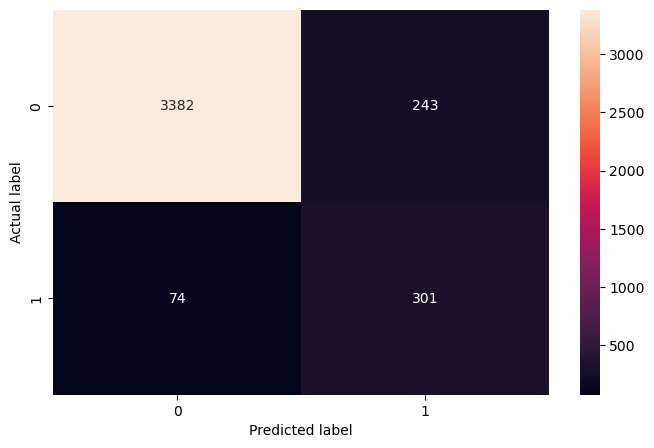

,Accuracy,Recall,Precision,F1-score
0,0.92075,0.802667,0.553309,0.65506


In [67]:
log_reg4_train = model_performance_classification(log_reg4, x_train2_sd, y_train, threshold  = 0.2)
log_reg4_train

The model predicts correctly that 3382 customer did not accept the personal loan and 301 customer accept the personal loan.

The model predicts wrongly that 242 customer who accept the personal loan are not accepting the personal loan and 74 customers who did not accept the personal loan are customer who accept the personal loan according to the confusion matrix.

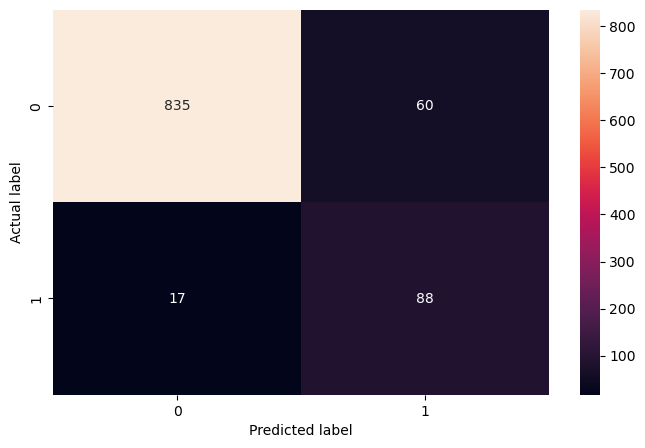

,Accuracy,Recall,Precision,F1-score
0,0.923,0.838095,0.594595,0.695652


In [68]:
log_reg4_test = model_performance_classification(log_reg4, x_test2_sd,y_test, threshold  = 0.2)
log_reg4_test

Based on these metrics, it appears that the model is performing reasonably, this mean the model is generalizing well. This is indicated by the moderate performance across all datasets, as the model could potentially achieve higher recall, precision, and F1-score values.

Although the model's accuracy is around 91-92%, indicating that it correctly classifies the majority of the samples, the precision and F1-score are relatively low. This suggests that the model may have difficulty correctly identifying positive instances (customer who accept the personal loan). The recall values are relatively high, indicating that the model has better performance in identifying true positive instances.

The consistent performance across the training, and test sets suggests that the model is generalizing well and not overfitting to the training data. However, the slightly low precision and F1-score indicate that there is room for improvement in correctly predicting the positive class.

# Decision Trees

- We don't need to normalize in decision tree
- Note that decision tree is prone to overfitting

In [69]:
# create an instance
dec_tree = DecisionTreeClassifier(random_state= 0, class_weight={0:0.1, 1:0.9})

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

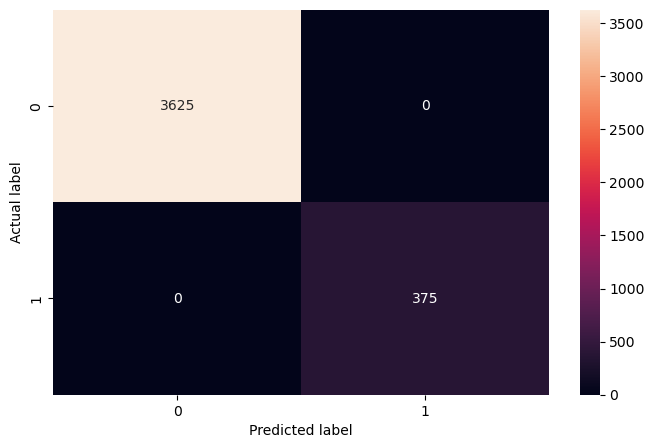

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [70]:
# training decision tree
dec_train = model_performance_classification(dec_tree, x_train, y_train)

dec_train 

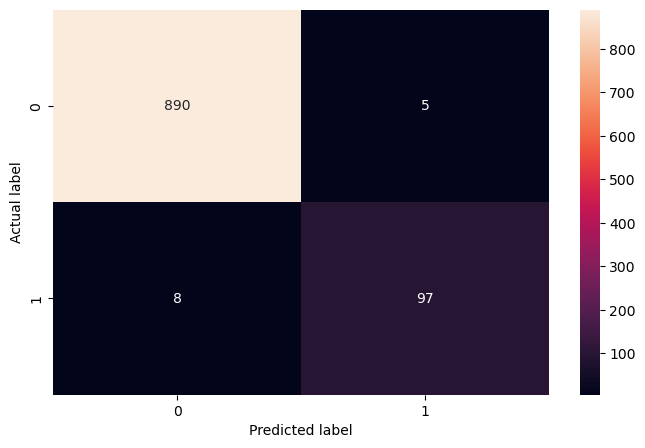

,Accuracy,Recall,Precision,F1-score
0,0.987,0.92381,0.95098,0.937198


In [71]:
# testing decision tree
dec_test = model_performance_classification(dec_tree,x_test, y_test)

dec_test

In [72]:
importances = dec_tree.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.01769512892591826
Experience: 0.021434211132669145
Income: 0.6043874878733112
Family: 0.15396330348046566
CCAvg: 0.09760733451748968
Education: 0.09549521956774552
Mortgage: 0.0033810708911268233
Securities_Account: 0.0
CD_Account: 0.0
Online: 0.002123460608836204
CreditCard: 0.0039127830024375965


The output shows the feature importances for each variable in a decision tree model. The feature importances represent the relative importance of each variable in predicting the target variable(Personal Loan. Here's the interpretation for each variable:

Age: This variable has an importance of 0.0177, indicating a relatively low importance compared to other variables. Age has a weak influence on predicting the Personal Loan.

Experience: This variable has an importance of 0.0214, also indicating a relatively low importance. Experience has a weak influence on Personal Loan.

Income: This variable has the highest importance of 0.6044, suggesting that it is the most important variable in predicting the target variable. Higher income values have a strong positive influence on Personal Loan.

Family: This variable has an importance of 0.1540, indicating a moderate importance. The number of family members has a moderate influence on Personal Loan.

CCAvg: This variable has an importance of 0.0976, indicating a moderate importance. Average credit card spending per month has a moderate influence on Personal Loan.

Education: This variable has an importance of 0.0955, also indicating a moderate importance. Higher education levels have a moderate positive influence on Personal Loan.

Mortgage: This variable has a very low importance of 0.0034, suggesting that it has little impact on predicting the target variable.

Securities_Account, CD_Account, Online, and CreditCard: These variables have very low importances of 0.0 or close to 0.0, indicating that they have little to no influence on predicting the target variable.

In summary, income, family, CCAvg, and education are the key variables that have a strong relationship with the dependent variable, while variables like age, experience, mortgage, and the presence of securities accounts, CD accounts, online banking, and credit cards have minimal influence on predicting the target variable in the decision tree model.

# Model performance evaluation and improvement

In [73]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(random_state=0)

# Apply the SMOTE algorithm to the data
X_sm, y_sm = smote.fit_resample(X, y)

In [74]:
from collections import Counter

Counter(y_sm)

Counter({0: 4520, 1: 4520})

In [75]:
# split the dataset

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 0)

In [76]:
#Build the Model
dec2_tree = DecisionTreeClassifier(random_state=0)

dec2_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

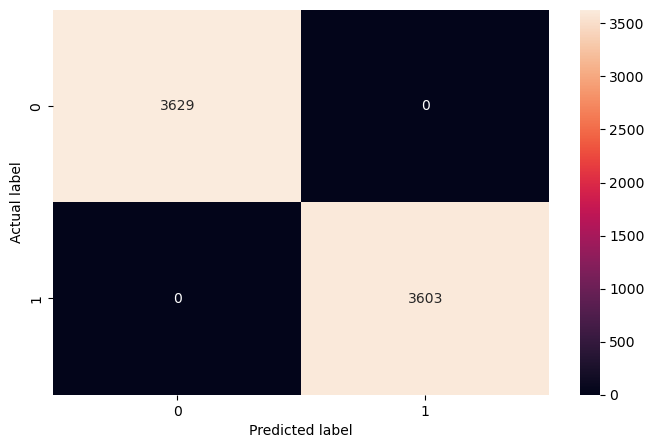

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [77]:
# training decision tree
dec2_train = model_performance_classification(dec2_tree, x_train_sm, y_train_sm)

dec2_train

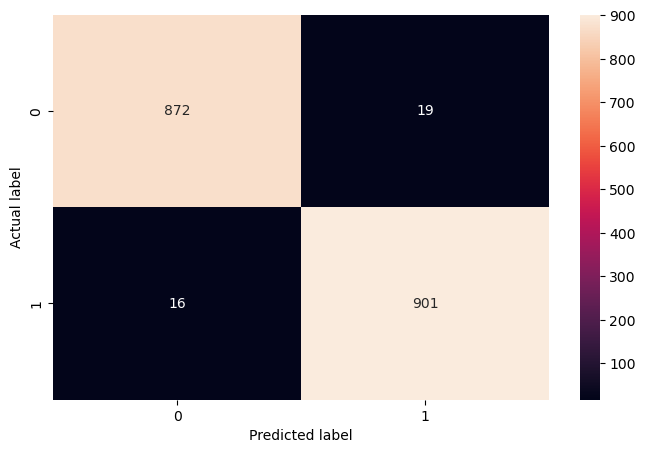

,Accuracy,Recall,Precision,F1-score
0,0.980642,0.982552,0.979348,0.980947


In [78]:
# training decision tree
dec2_test = model_performance_classification(dec2_tree, x_test_sm, y_test_sm)

dec2_test

The model perform better without blancing the data with SMOTE, Beacuse the FP and FN negative increases on testing. Just that the recall, precision and F1-score

The model perform better

In [79]:
importances = dec2_tree.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.015708177280804897
Experience: 0.01446164403835034
Income: 0.6486232883653682
Family: 0.09210813495155937
CCAvg: 0.13655192974071984
Education: 0.06630430726951873
Mortgage: 0.009603195517365742
Securities_Account: 0.0
CD_Account: 0.0
Online: 0.010016090484124001
CreditCard: 0.00662323235218901


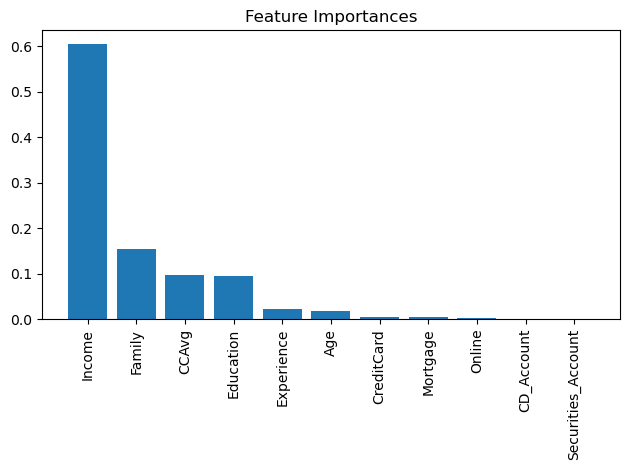

In [80]:
importances = dec_tree.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

# Apply pre-prunning strategy

In [81]:
# Build the Model

#Build the Model
dec3_tree = DecisionTreeClassifier(random_state=0, max_depth=4)

dec3_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

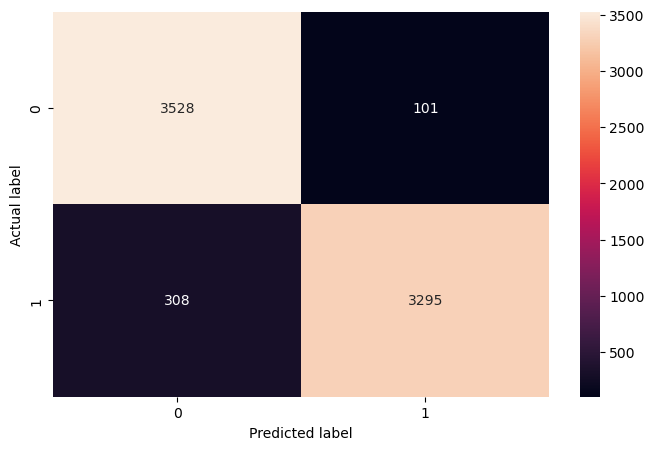

,Accuracy,Recall,Precision,F1-score
0,0.943446,0.914516,0.970259,0.941563


In [82]:
# training decision tree
dec3_train = model_performance_classification(dec3_tree, x_train_sm, y_train_sm)

dec3_train

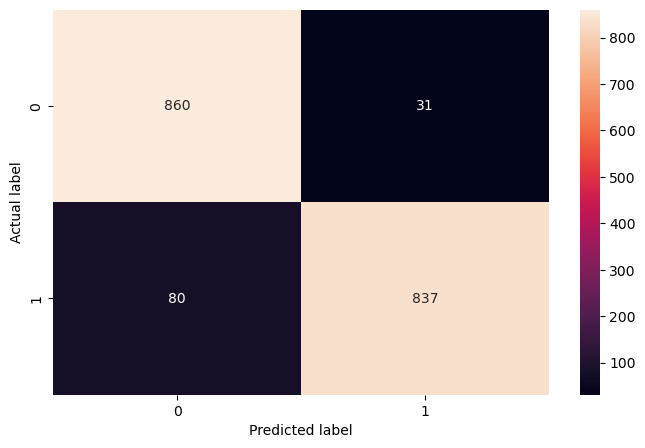

,Accuracy,Recall,Precision,F1-score
0,0.938606,0.912759,0.964286,0.937815


In [83]:
# testing decision tree
dec3_test = model_performance_classification(dec3_tree, x_test_sm, y_test_sm)

dec3_test

# Drawing Decision Tree Model

In [84]:
import pydotplus

from IPython.display import Image 

In [85]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

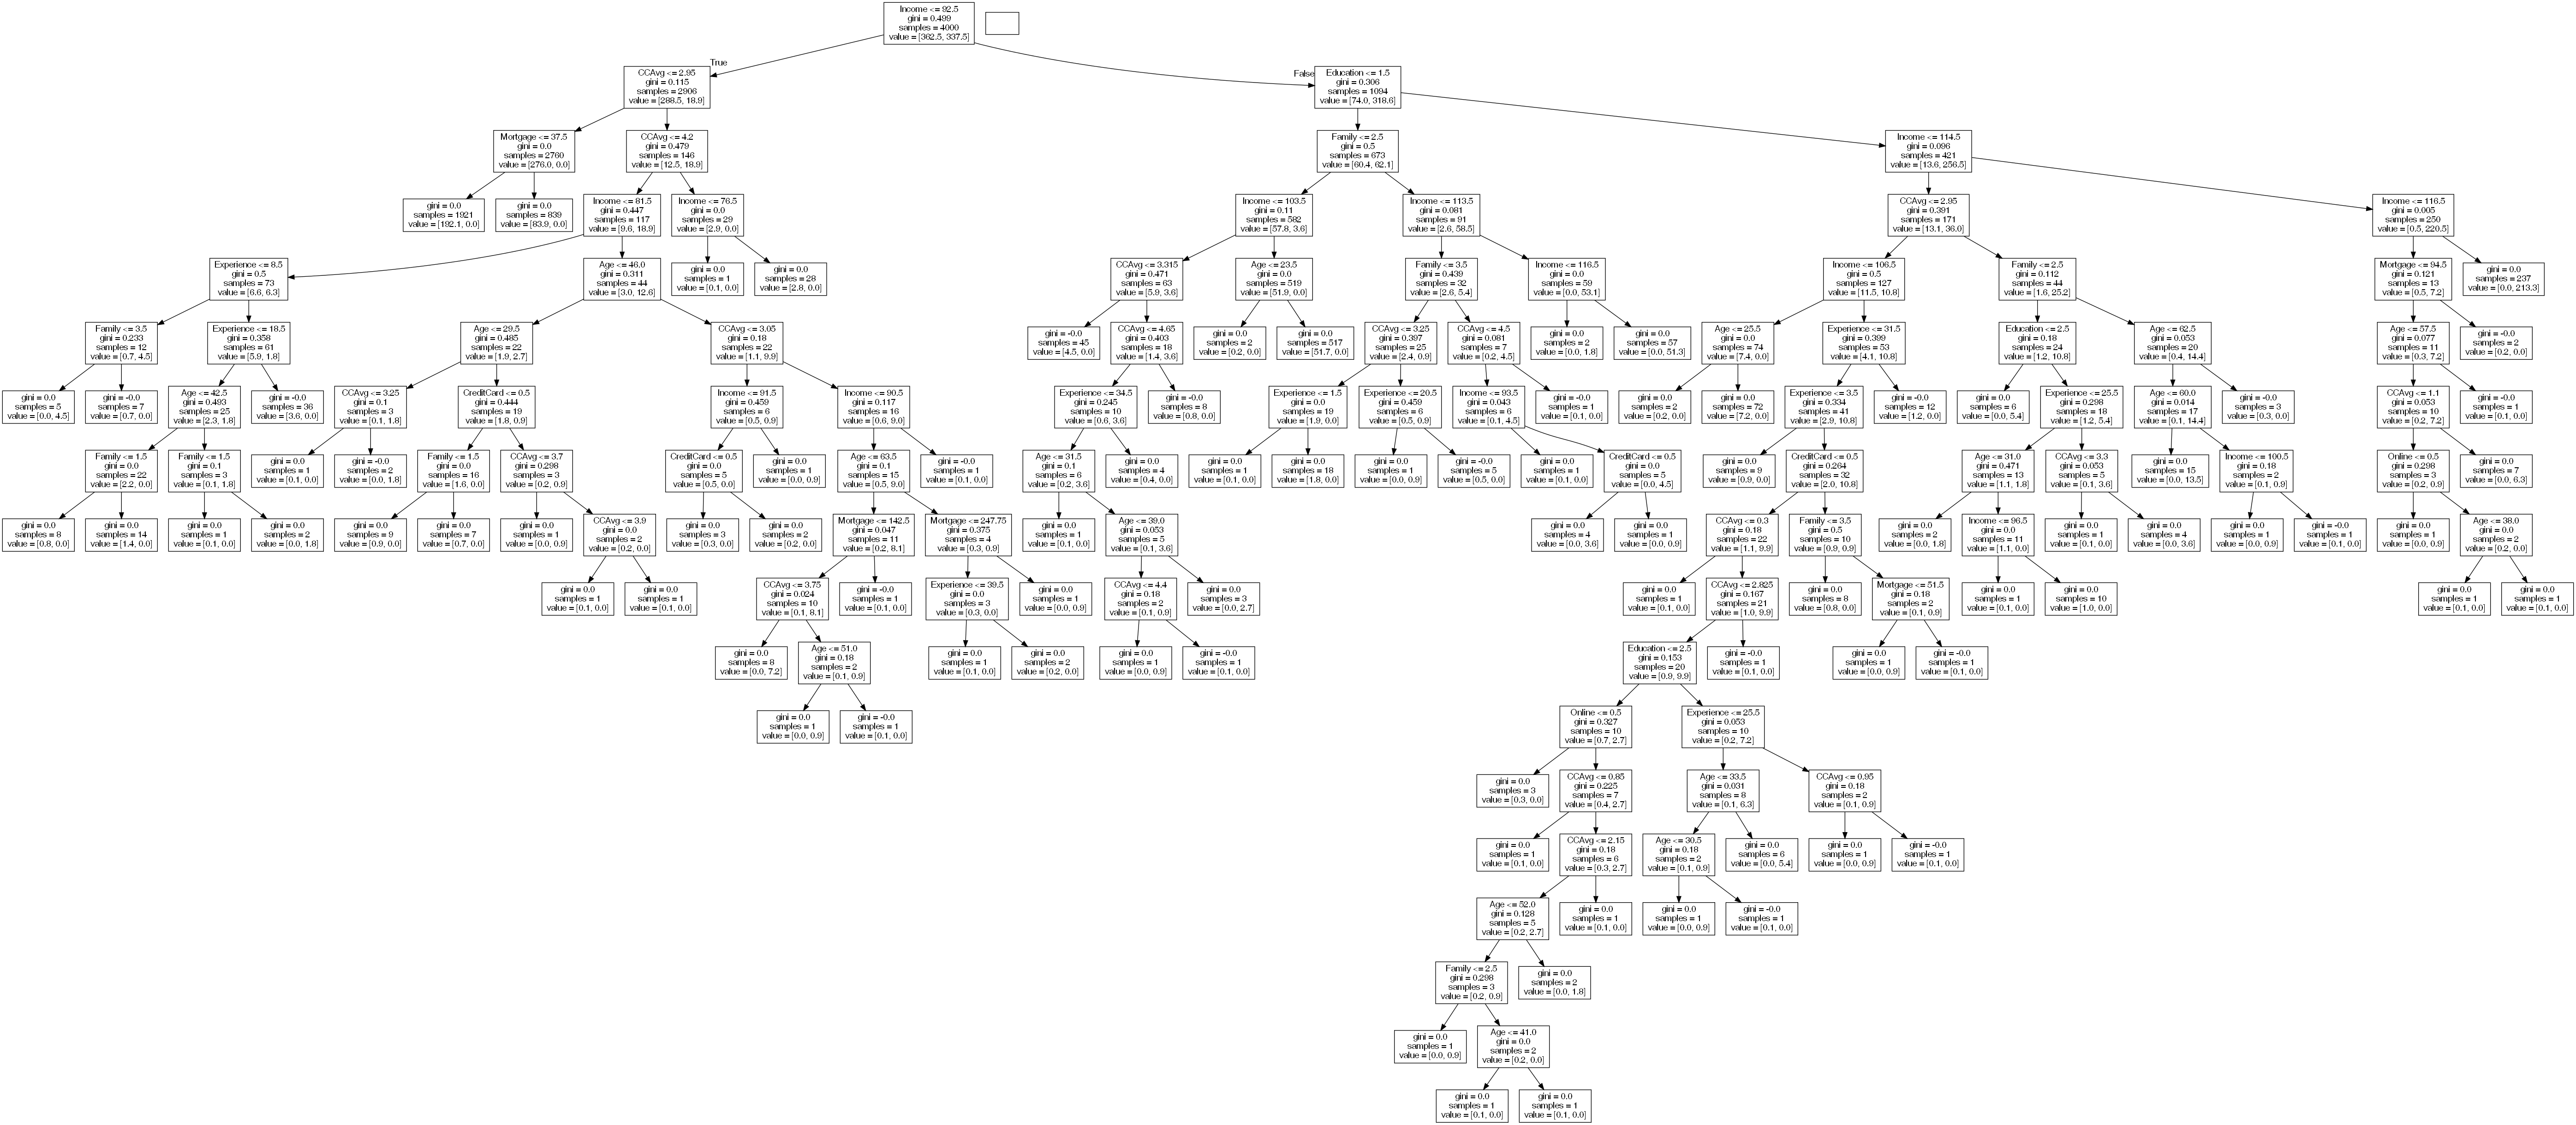

In [86]:
# The Tree without applying SMOTE or Prunning
dot_data = tree.export_graphviz(dec_tree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)

# Create a visualization
image = Image(graph.create_png())
display(image)

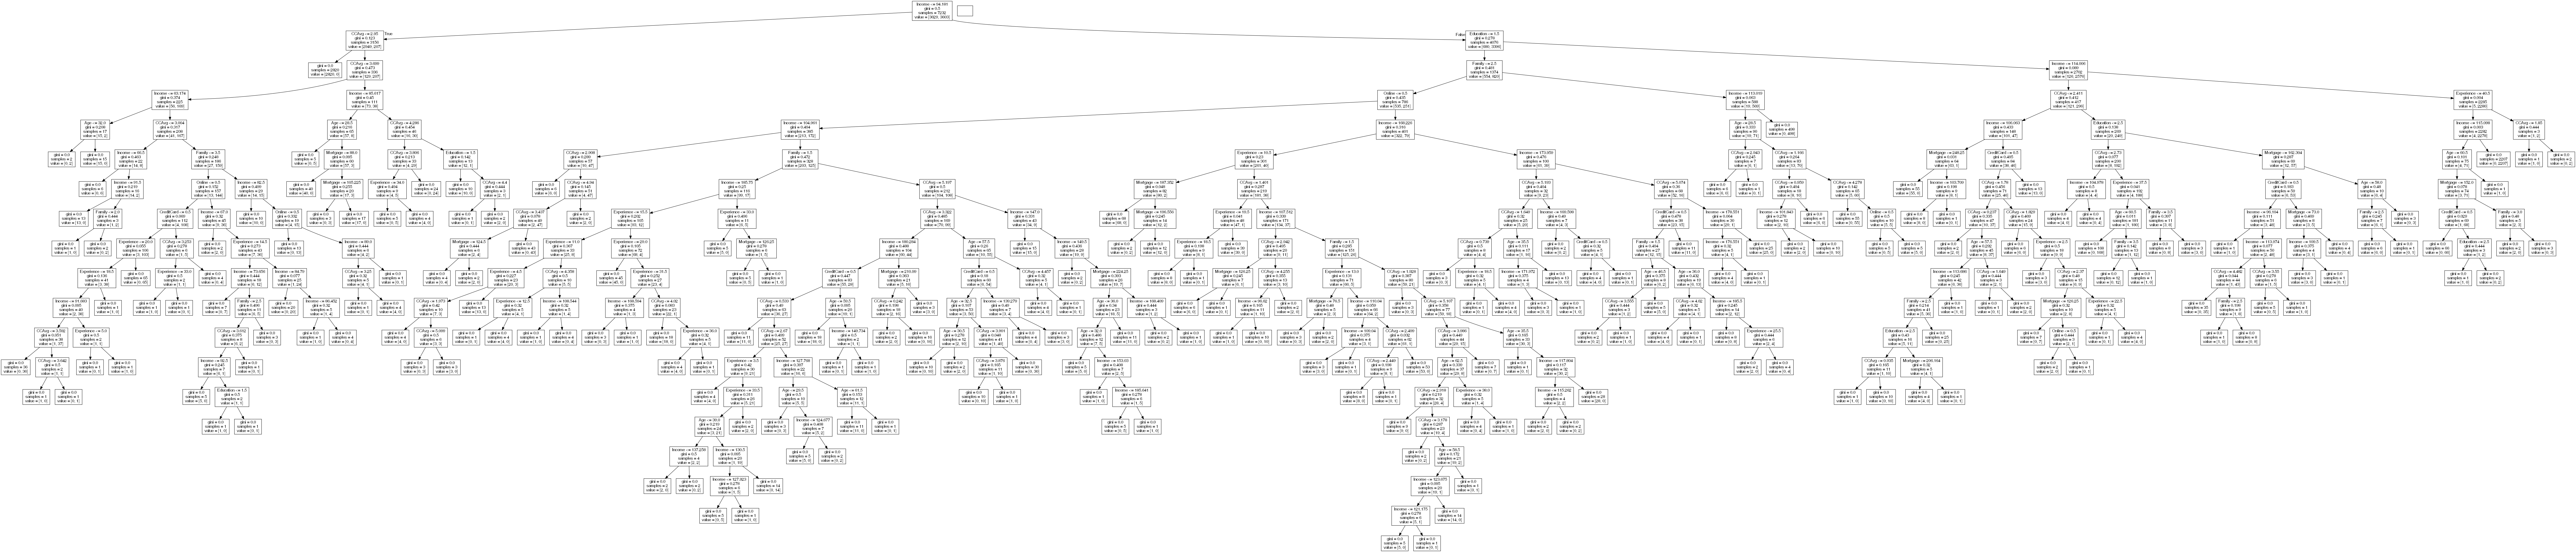

In [87]:
# The Tree with SMOTE 
dot_data = tree.export_graphviz(dec2_tree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)

# Create a visualization
image = Image(graph.create_png())
display(image)

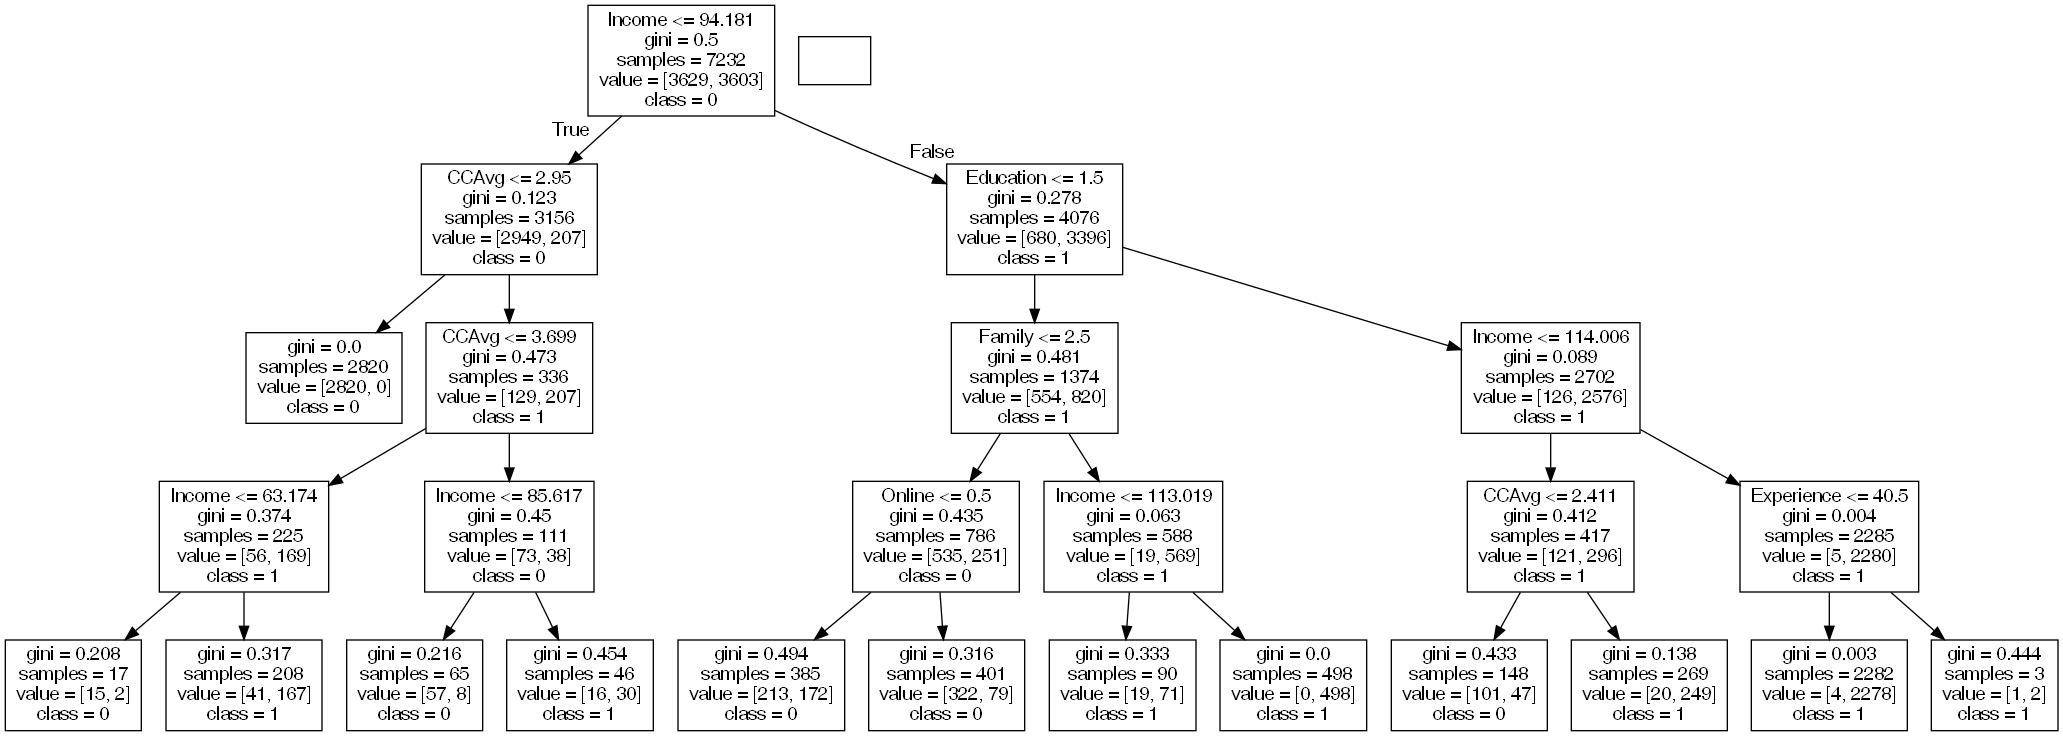

In [88]:
# The Tree with pruning
dot_data = tree.export_graphviz(dec3_tree, out_file=None, feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data)

# Create a visualization
image = Image(graph.create_png())
display(image)


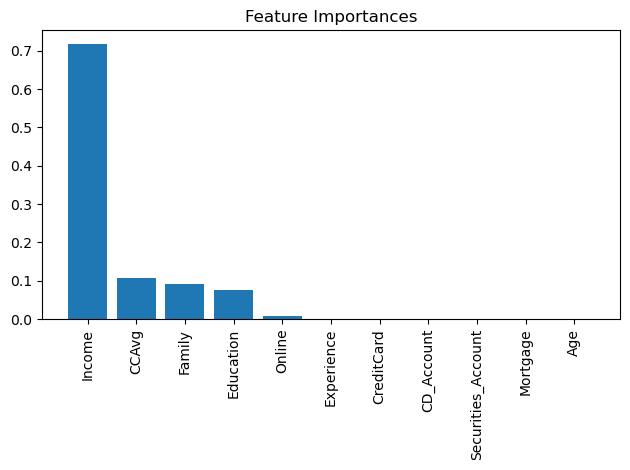

In [89]:
importances = dec3_tree.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

The plot above show that  customer income is contributing relatively high, while Average spending on credit cards per month is also contributing to the persional loan follow by family and education.   

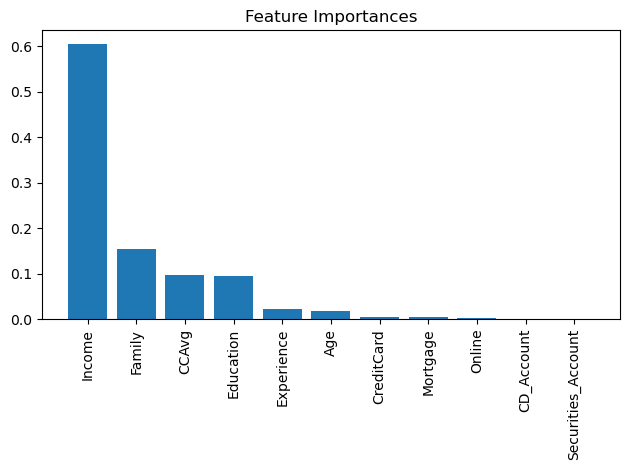

In [90]:
importances = dec_tree.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

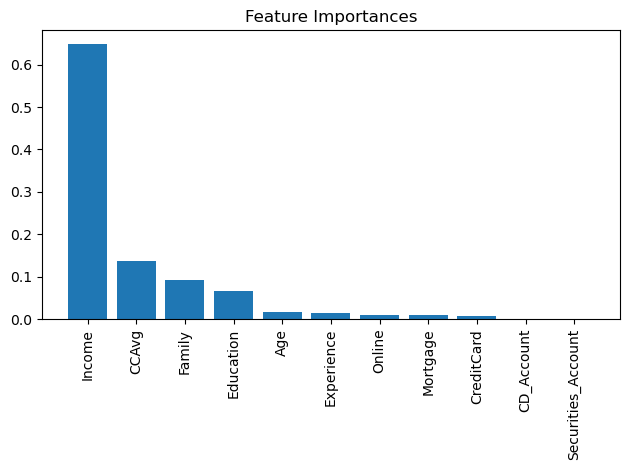

In [91]:
importances = dec2_tree.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

Note: The model perform better without balancing the data, if you look at the feature important for both of them you see that Age and Mortgage was contributing well.  

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Prune the decision tree (example of pre-pruning using max_depth)
pruned_model = DecisionTreeClassifier(max_depth=3)
pruned_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_train)
y_pred_pruned = pruned_model.predict(X_train)

# Evaluate the model on appropriate metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Evaluate the pruned model on appropriate metrics
accuracy_pruned = accuracy_score(y_train, y_pred_pruned)
precision_pruned = precision_score(y_train, y_pred_pruned)
recall_pruned = recall_score(y_train, y_pred_pruned)
f1_pruned = f1_score(y_train, y_pred_pruned)

# Print the evaluation results
print("Original Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nPruned Model:")
print("Accuracy (Pruned):", accuracy_pruned)
print("Precision (Pruned):", precision_pruned)
print("Recall (Pruned):", recall_pruned)
print("F1 Score (Pruned):", f1_pruned)


Original Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Pruned Model:
Accuracy (Pruned): 0.98025
Precision (Pruned): 1.0
Recall (Pruned): 0.7893333333333333
F1 Score (Pruned): 0.8822652757078986


Accuracy: It represents the overall correctness of the model's predictions. In the original model, the accuracy is 1.0, which means the model correctly predicts the target variable in 100% of the cases. In the pruned model, the accuracy is slightly lower at 0.980, indicating a small reduction in overall prediction correctness.

Precision: It measures the proportion of correctly predicted positive instances among all instances predicted as positive. In the original model, the precision is 1.00, indicating that 100% of the instances predicted as positive are actually positive. In the pruned model, the precision is 1.0, meaning that all positive predictions are correct.

Recall: It calculates the proportion of correctly predicted positive instances among all actual positive instances. In the original model, the recall is 1.0, indicating that 100% of the actual positive instances are correctly identified by the model. In the pruned model, the recall is 0.78, indicating that 79% of the positive instances are correctly identified.

F1 Score: It is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. In the original model, the F1 score is 0.942, indicating a good balance between precision and recall. In the pruned model, the F1 score is 0.906, still indicating a reasonable balance between precision and recall, but slightly lower than the original model.

Overall, both the original and pruned models demonstrate high accuracy and reasonable performance in terms of precision, recall, and F1 score. The pruned model achieves perfect precision but sacrifices some recall compared to the original model.

# Random Forest Classification

In [93]:
# # create an instance
# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# create an instance
rf = RandomForestClassifier(random_state= 0, class_weight={0:0.1, 1:0.9})

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

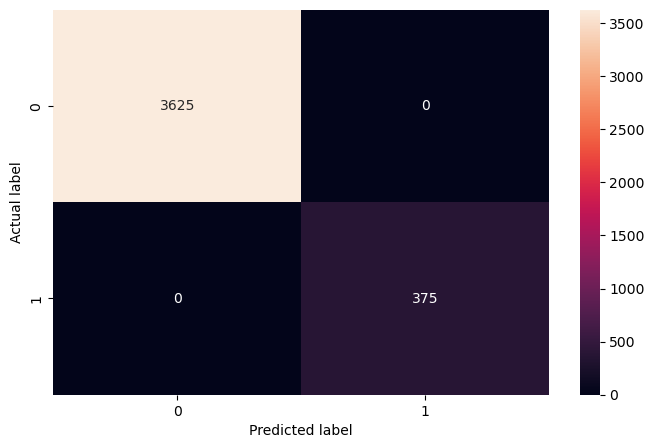

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [94]:
# training Random forest
rf_train = model_performance_classification(rf, x_train, y_train)

rf_train 

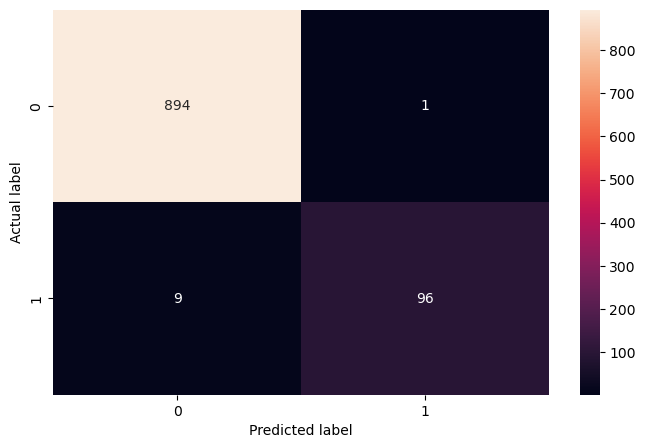

,Accuracy,Recall,Precision,F1-score
0,0.99,0.914286,0.989691,0.950495


In [95]:
# testing Random forest
rf_test = model_performance_classification(rf, x_test, y_test)

rf_test 

In [96]:
importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.03481621582446793
Experience: 0.029113822731488864
Income: 0.4941027643727184
Family: 0.08256469552198237
CCAvg: 0.20502519205863873
Education: 0.10392049390214787
Mortgage: 0.038904859633564555
Securities_Account: 0.0
CD_Account: 0.0
Online: 0.0060421261373704484
CreditCard: 0.005509829817620869


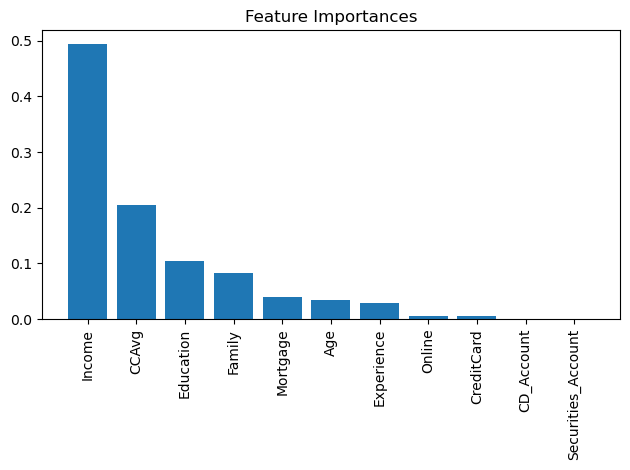

In [97]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

# Model Improvement Using Smote - Balaning dataset

In [98]:
# create an instance
rf2 = RandomForestClassifier(random_state= 0, class_weight={0:0.1, 1:0.9})

# Train the Model
rf2.fit(x_train_sm, y_train_sm)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

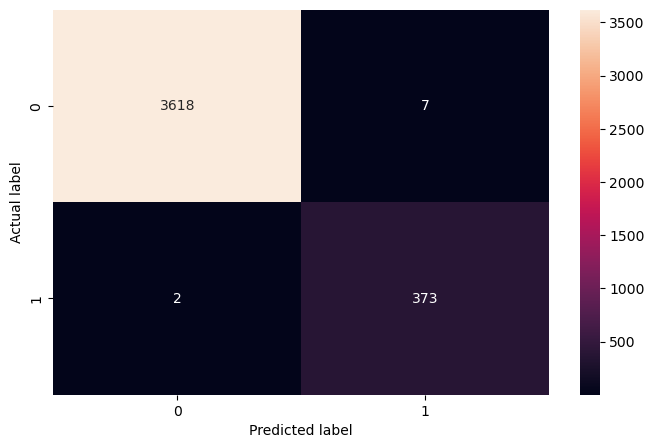

,Accuracy,Recall,Precision,F1-score
0,0.99775,0.994667,0.981579,0.988079


In [99]:
# Training Random forest
rf2_train = model_performance_classification(rf2, x_train, y_train)

rf2_train

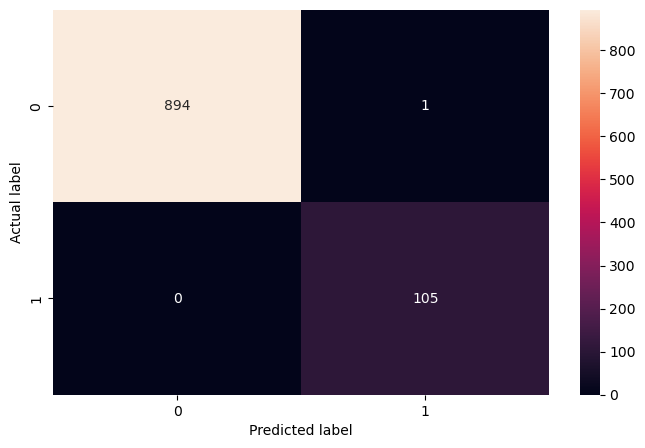

,Accuracy,Recall,Precision,F1-score
0,0.999,1.0,0.990566,0.995261


In [100]:
# Testing Random forest
rf2_test = model_performance_classification(rf2, x_test, y_test)

rf2_test

The model is realy performing/generalizing  well on random forest compaire to decision tree, because my focuse is recall.

# Visualizing Feature Importances for Random Forest Algorithm

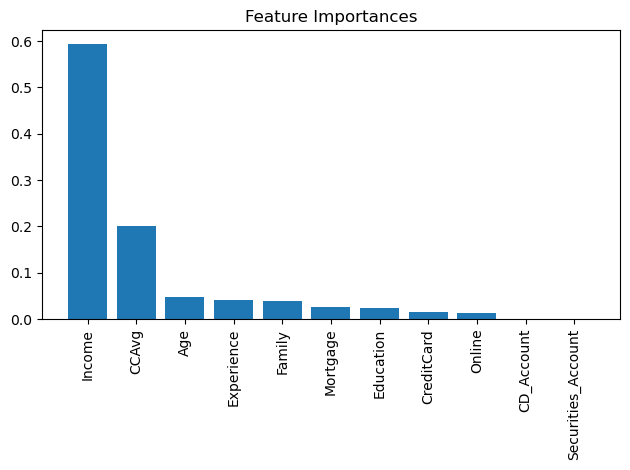

In [101]:
importances = rf2.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

For random forest it show more that are contributing to personal loan.

# Gradient Boosting 

In [102]:
# create an instance
gb = GradientBoostingClassifier(random_state= 0)

gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

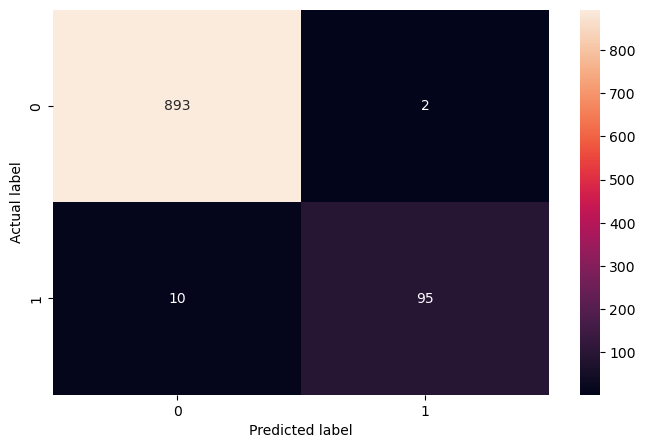

,Accuracy,Recall,Precision,F1-score
0,0.988,0.904762,0.979381,0.940594


In [103]:
# testing Random forest
gb_test = model_performance_classification(gb, x_test, y_test)

gb_test

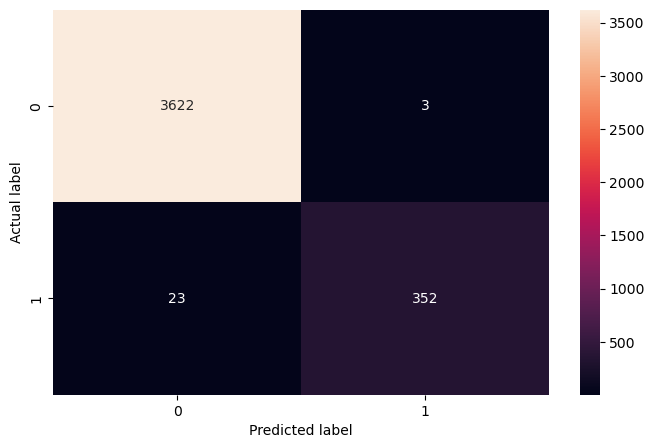

,Accuracy,Recall,Precision,F1-score
0,0.9935,0.938667,0.991549,0.964384


In [107]:
# training Random forest
gb_train = model_performance_classification(gb, x_train, y_train)

gb_train

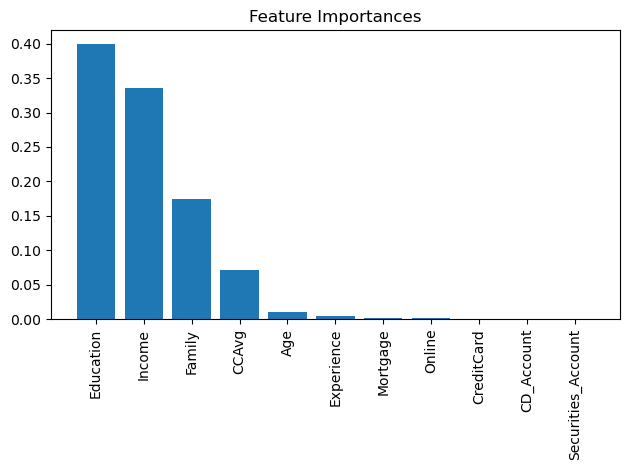

In [108]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)  # Set x-axis labels as feature names
plt.tight_layout()
plt.show()

### Tuning by seting my max_depth =10

In [114]:
# create an instance
gb3 = GradientBoostingClassifier(random_state= 0, max_depth=10)

gb3.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=10, random_state=0)

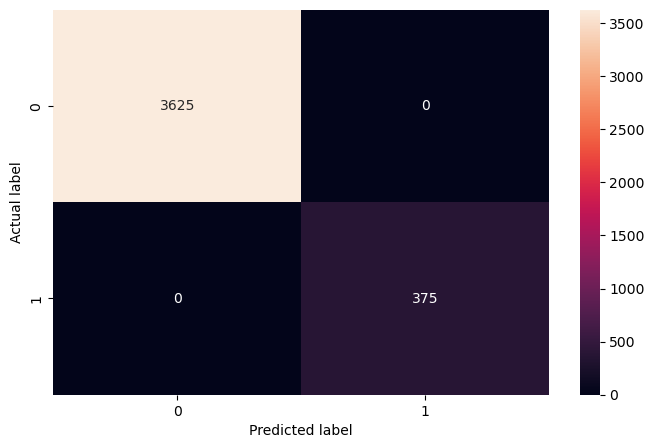

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [116]:
# Training Gradient Boosting
gb3_train = model_performance_classification(gb3, x_train, y_train)

gb3_train

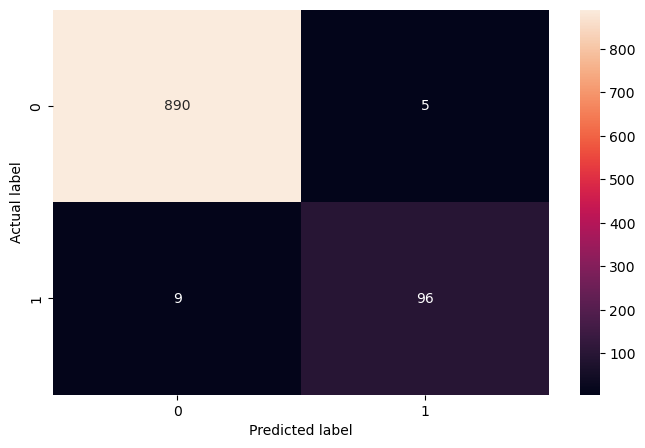

,Accuracy,Recall,Precision,F1-score
0,0.986,0.914286,0.950495,0.932039


In [115]:
# Testing Gradient Boosting
gb3_test = model_performance_classification(gb3, x_test, y_test)

gb3_test

It only perform better on training but not performing well on testing

# Model Improvement Using Smote - Balaning dataset

In [109]:
# create an instance
gb2 = GradientBoostingClassifier(random_state= 0)

# Train the Model
gb2.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

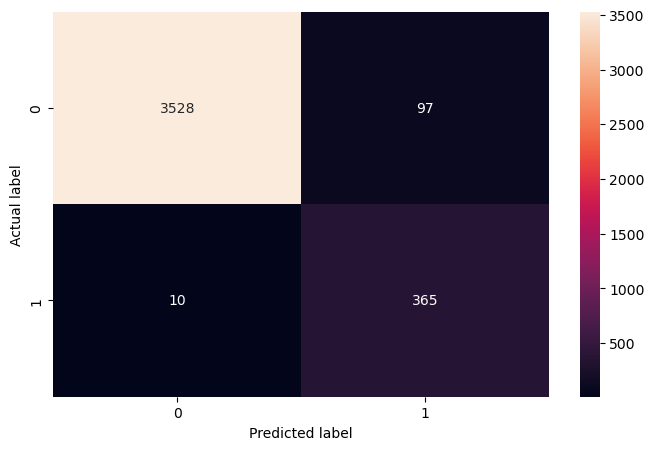

,Accuracy,Recall,Precision,F1-score
0,0.97325,0.973333,0.790043,0.872162


In [110]:
# Training Gradient Boosting
gb2_train = model_performance_classification(gb2, x_train, y_train)

gb2_train

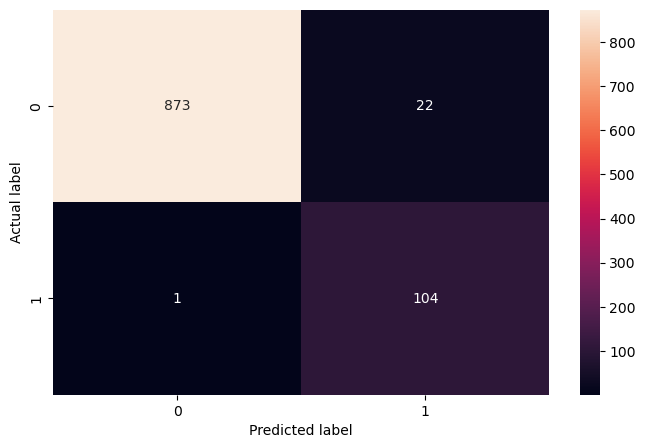

,Accuracy,Recall,Precision,F1-score
0,0.977,0.990476,0.825397,0.900433


In [111]:
# Testing Gradient Boosting
gb2_test = model_performance_classification(gb2, x_test, y_test)

gb2_test